# Symmetric Matrices and Positive Definiteness

## 1) Definition

A **symmetric matrix** $A \in \mathbb{R}^{n \times n}$ satisfies:

$$
A = A^T
$$

A **positive definite matrix** $A$ satisfies:

$$
\mathbf{x}^T A \mathbf{x} > 0 \quad \forall \mathbf{x} \in \mathbb{R}^n, \mathbf{x} \neq 0
$$

- **Positive semi-definite:** $\mathbf{x}^T A \mathbf{x} \ge 0$
- **Negative definite:** $\mathbf{x}^T A \mathbf{x} < 0$
- **Negative semi-definite:** $\mathbf{x}^T A \mathbf{x} \le 0$


## 2) Derivation

1. For a symmetric matrix $A = A^T$, the eigenvalues are real:
$$
A \mathbf{v} = \lambda \mathbf{v}, \quad \lambda \in \mathbb{R}
$$

2. Positive definiteness can be verified using eigenvalues:
$$
A \text{ is positive definite} \iff \lambda_i > 0 \quad \forall i
$$

3. Quadratic form representation:
$$
\mathbf{x}^T A \mathbf{x} > 0 \quad \forall \mathbf{x} \neq 0
$$

4. Cholesky decomposition (optional):
$$
A = LL^T \quad \text{exists iff $A$ is symmetric positive definite}
$$


## 3) Computation Steps

**Step 1:** Check symmetry:
$$
A^T = A
$$

**Step 2:** Compute eigenvalues:
$$
\text{eigvals}(A) = \lambda_1, \dots, \lambda_n
$$

**Step 3:** Check positive definiteness:
- If $\lambda_i > 0$ for all $i$, $A$ is positive definite.
- If $\lambda_i \ge 0$ for all $i$, $A$ is positive semi-definite.
- If any $\lambda_i < 0$, $A$ is not positive definite.

**Step 4 (Optional):** Check quadratic form for a sample vector $\mathbf{x}$:
$$
\mathbf{x}^T A \mathbf{x} > 0
$$


In [1]:
import jax.numpy as jnp

# Example symmetric matrix
A = jnp.array([[2., -1.],
               [-1., 2.]])

# Step 1: Check symmetry
is_symmetric = jnp.allclose(A, A.T)

# Step 2: Compute eigenvalues
eigvals = jnp.linalg.eigvalsh(A)  # optimized for symmetric matrices

# Step 3: Check positive definiteness
is_pos_def = jnp.all(eigvals > 0)
is_pos_semi_def = jnp.all(eigvals >= 0)

print("Matrix A:\n", A)
print("Is symmetric:", is_symmetric)
print("Eigenvalues:", eigvals)
print("Positive definite:", is_pos_def)
print("Positive semi-definite:", is_pos_semi_def)

# Step 4: Quadratic form check
x = jnp.array([1., 1.])
quad_form = x.T @ A @ x
print("Quadratic form x^T A x:", quad_form)


Matrix A:
 [[ 2. -1.]
 [-1.  2.]]
Is symmetric: True
Eigenvalues: [1. 3.]
Positive definite: True
Positive semi-definite: True
Quadratic form x^T A x: 2.0


## 4) Plotting

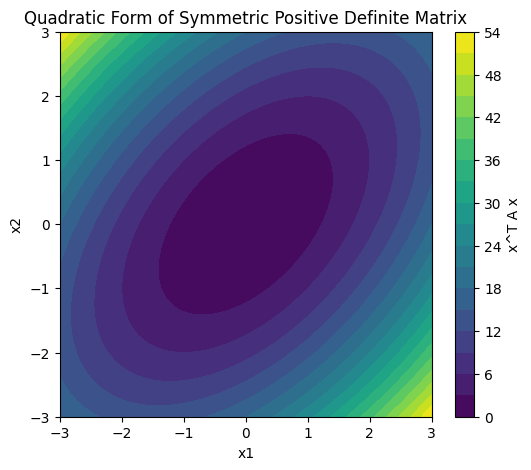

In [2]:
import matplotlib.pyplot as plt

# Create grid
x1 = jnp.linspace(-3, 3, 100)
x2 = jnp.linspace(-3, 3, 100)
X1, X2 = jnp.meshgrid(x1, x2)

# Compute quadratic form values
Z = A[0,0]*X1**2 + 2*A[0,1]*X1*X2 + A[1,1]*X2**2

plt.figure(figsize=(6,5))
plt.contourf(X1, X2, Z, levels=20, cmap='viridis')
plt.colorbar(label='x^T A x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Quadratic Form of Symmetric Positive Definite Matrix')
plt.show()


## 5) Use Cases of Symmetric Positive Definite Matrices

1. **Optimization:** Hessian matrices in convex optimization are symmetric positive definite.
2. **Cholesky Decomposition:** Efficiently solve linear systems $Ax = b$.
3. **Machine Learning:** Kernel matrices in Gaussian Processes are symmetric positive definite.
4. **Physics & Engineering:** Energy matrices and stiffness matrices are often symmetric positive definite.
5. **Numerical Stability:** Ensures stability in iterative solvers for linear systems.
6. **PCA & Covariance Matrices:** Covariance matrices are symmetric positive semi-definite.
